#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행 
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
import joblib



* 함수 생성

In [2]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
data = pd.read_csv("/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/data01_train.csv")
data = data.drop("subject",axis=1)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS


In [58]:
label_dict = {
    'STANDING': 0,
    'SITTING': 1,
    'LAYING': 2,
    'WALKING': 3,
    'WALKING_UPSTAIRS': 4,
    'WALKING_DOWNSTAIRS': 5
}

In [59]:
data["Activity"] = data["Activity"].map(label_dict)

#### 2) 기본 정보 조회

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,2
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,0
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,3
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,5


In [ ]:
data.shape

(5881, 562)

## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다. 


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [7]:
x=data.drop("Activity",axis=1)
y=data["Activity"]

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다. 
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 : 

In [ ]:
from xgboost import XGBRFClassifier

In [ ]:
model_xgb = XGBRFClassifier()
model_xgb.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, random_state=None,
                reg_alpha=None, ...)

,feature_name,feature_importance
0,fBodyAccMag-energy(),0.063193
1,tGravityAcc-mean()-X,0.040102
2,tGravityAcc-energy()-X,0.035482
3,tBodyGyroJerk-mad()-X,0.023768
4,tBodyAccMag-std(),0.023494
5,fBodyAccMag-std(),0.023144
6,fBodyAccMag-mad(),0.023099
7,fBodyAcc-skewness()-X,0.021757
8,tGravityAcc-min()-X,0.020238
9,"fBodyGyro-bandsEnergy()-17,24",0.018974


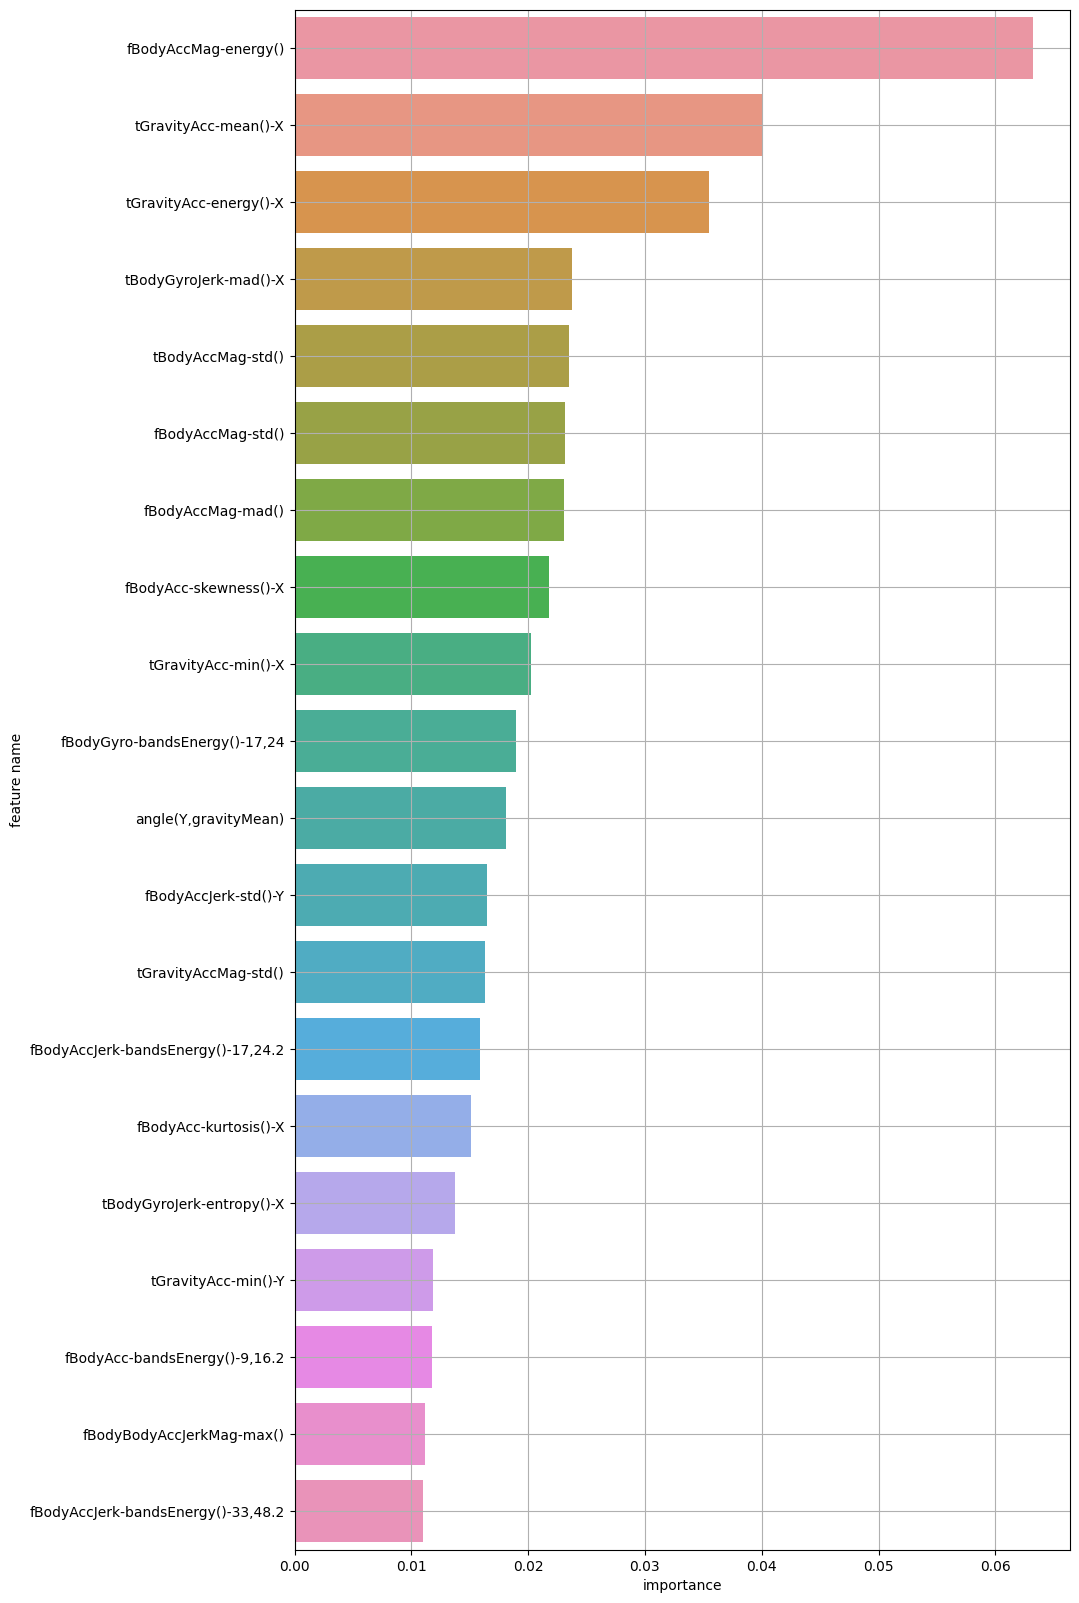

In [ ]:
plot_feature_importance(model_xgb.feature_importances_,x.columns,result_only = False, topn =20)

In [ ]:
y_pred = model_xgb.predict(x_test)
y_pred

array([2, 3, 0, ..., 5, 1, 5])

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="macro"))
print(confusion_matrix(y_test,y_pred))

0.9694137638062872
0.9698549000763843
[[209   9   0   0   0   0]
 [ 16 189   0   0   1   0]
 [  0   0 223   0   0   0]
 [  0   0   0 198   2   0]
 [  0   0   0   1 171   0]
 [  0   0   0   4   3 151]]


### (2) 알고리즘2 : 

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = model_svm.predict(x_test)
y_pred

array([2, 3, 0, ..., 5, 1, 5])

In [ ]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="macro"))
print(confusion_matrix(y_test,y_pred))

0.9813084112149533
0.9823967448112562
[[209   9   0   0   0   0]
 [ 10 194   1   0   1   0]
 [  0   0 223   0   0   0]
 [  0   0   0 199   0   1]
 [  0   0   0   0 172   0]
 [  0   0   0   0   0 158]]


### (3) 알고리즘3 : 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier()
model.fit(x_train,y_train)

Learning rate set to 0.085629
0:	learn: 1.5153150	total: 1.64s	remaining: 27m 17s
1:	learn: 1.3261270	total: 2.33s	remaining: 19m 23s
2:	learn: 1.1789809	total: 3.01s	remaining: 16m 39s
3:	learn: 1.0546890	total: 3.7s	remaining: 15m 21s
4:	learn: 0.9607862	total: 4.37s	remaining: 14m 28s
5:	learn: 0.8791141	total: 5.06s	remaining: 13m 59s
6:	learn: 0.8066818	total: 5.75s	remaining: 13m 35s
7:	learn: 0.7427876	total: 6.42s	remaining: 13m 16s
8:	learn: 0.6930346	total: 7.1s	remaining: 13m 2s
9:	learn: 0.6480381	total: 7.78s	remaining: 12m 50s
10:	learn: 0.6036914	total: 8.45s	remaining: 12m 40s
11:	learn: 0.5650227	total: 9.14s	remaining: 12m 32s
12:	learn: 0.5305139	total: 10.3s	remaining: 13m
13:	learn: 0.5017462	total: 11.3s	remaining: 13m 18s
14:	learn: 0.4751251	total: 12.4s	remaining: 13m 36s
15:	learn: 0.4507195	total: 13.4s	remaining: 13m 45s
16:	learn: 0.4278177	total: 14.1s	remaining: 13m 36s
17:	learn: 0.4069039	total: 14.8s	remaining: 13m 28s
18:	learn: 0.3882791	total: 15.5s

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[2],
       [3],
       [0],
       ...,
       [5],
       [1],
       [5]])

In [ ]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="macro"))
print(confusion_matrix(y_test,y_pred))

0.9889549702633815
0.989431161867759
[[214   4   0   0   0   0]
 [  7 199   0   0   0   0]
 [  0   0 223   0   0   0]
 [  0   0   0 199   1   0]
 [  0   0   0   0 172   0]
 [  0   0   0   0   1 157]]


,feature_name,feature_importance
0,"angle(X,gravityMean)",8.732334
1,tGravityAcc-mean()-Y,4.660284
2,tGravityAcc-energy()-Y,3.879180
3,tGravityAcc-max()-Y,2.934849
4,"tBodyAcc-correlation()-X,Y",2.692970
5,tGravityAcc-min()-X,2.466913
6,tBodyAccJerk-entropy()-Y,2.147916
7,"fBodyAcc-bandsEnergy()-49,56",2.090243
8,tGravityAcc-energy()-X,1.963476
9,"tGravityAcc-arCoeff()-Y,2",1.860159


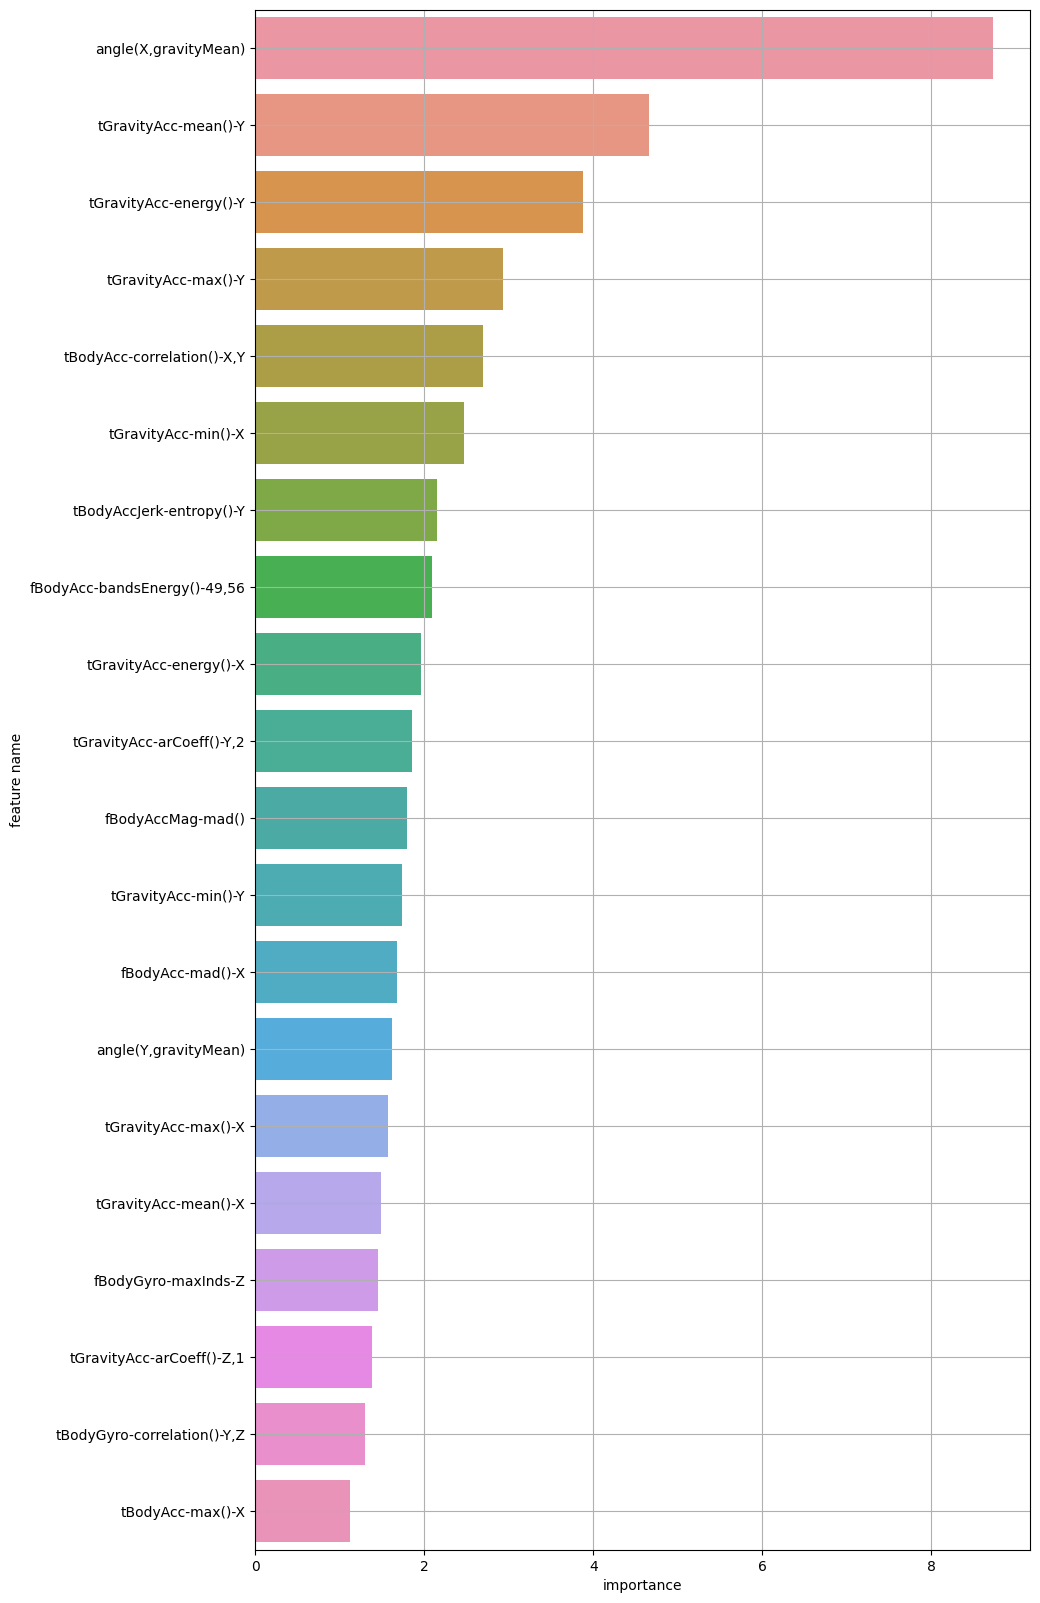

In [ ]:
plot_feature_importance(model.feature_importances_,x.columns,result_only = False, topn =20)

### (4) 알고리즘4 : 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_rf.predict(x_test)
y_pred

array([2, 3, 0, ..., 5, 1, 5])

In [ ]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="macro"))
print(confusion_matrix(y_test,y_pred))

0.9779099405267629
0.9781402154085566
[[217   1   0   0   0   0]
 [ 16 189   0   0   1   0]
 [  0   0 223   0   0   0]
 [  0   0   0 195   1   4]
 [  0   0   0   1 170   1]
 [  0   0   0   1   0 157]]


,feature_name,feature_importance
0,tGravityAcc-mean()-Y,0.030621
1,"angle(X,gravityMean)",0.028091
2,tGravityAcc-min()-X,0.026538
3,tGravityAcc-min()-Y,0.026244
4,tGravityAcc-mean()-X,0.025430
5,"angle(Y,gravityMean)",0.024989
6,tGravityAcc-energy()-X,0.023658
7,tGravityAcc-max()-X,0.023520
8,tGravityAcc-max()-Y,0.019968
9,tGravityAcc-mean()-Z,0.017381


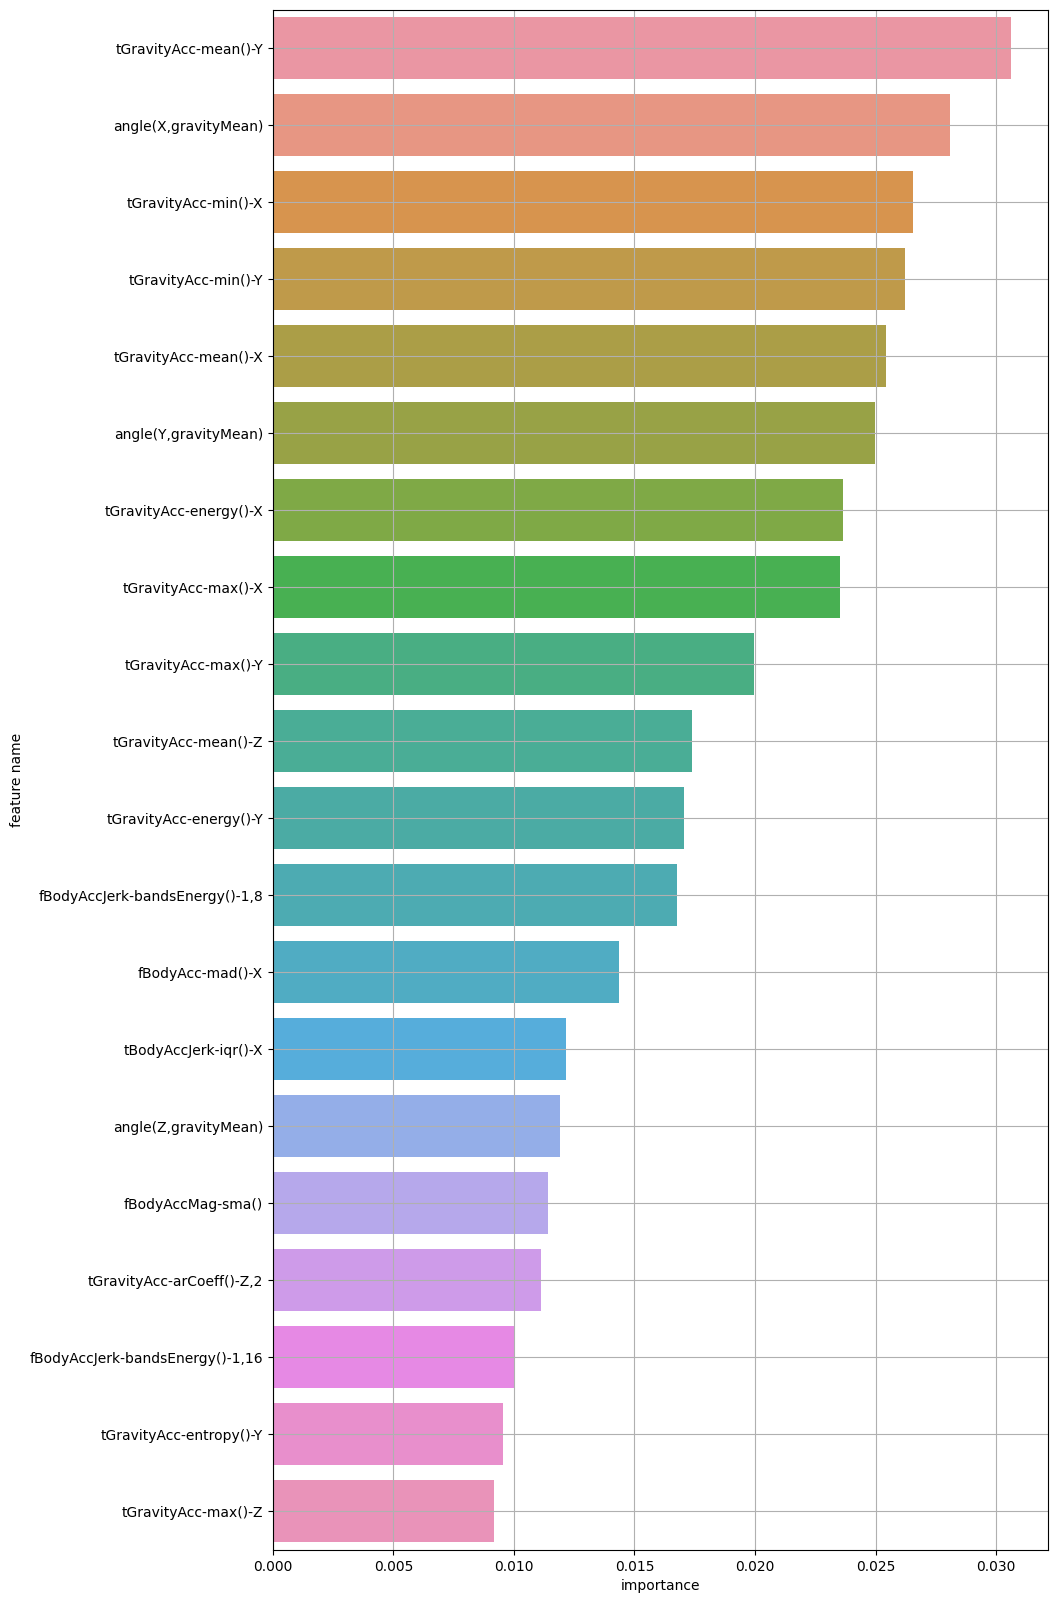

In [ ]:
plot_feature_importance(model_rf.feature_importances_,x.columns,result_only = False, topn =20)

In [ ]:
#################----------------------------------------------------------------------------------------------------------------------------

In [9]:
import joblib
features = joblib.load("/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/feature_importance.pkl")
features

,sensor,agg,axis,feature_name,feature_importance_1,feature_importance_2,feature_importance_3,feature_importance_4,feature_importance_5,feature_importance_6,feature_importance_7,feature_importance_8
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000199,0.000060,0.000244,0.000267,0.000078,0.000189,0.000252,0.000103
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000429,0.000040,0.000959,0.000256,0.000148,0.000115,0.000469,0.000560
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000158,0.000034,0.000189,0.000289,0.000017,0.000164,0.000240,0.000254
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.007736,0.000017,0.008841,0.002424,0.000192,0.006646,0.005475,0.008862
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000296,0.000000,0.002033,0.000368,0.000000,0.000217,0.000172,0.001301
...,...,...,...,...,...,...,...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000271,0.000000,0.000999,0.000973,0.000057,0.000266,0.000189,0.000144
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000969,0.000000,0.003035,0.000533,0.000066,0.000084,0.000188,0.000044
558,angle,X,gravityMean,"angle(X,gravityMean)",0.029993,0.000034,0.010309,0.018144,0.062332,0.001979,0.005001,0.000921
559,angle,Y,gravityMean,"angle(Y,gravityMean)",0.024766,0.000154,0.031652,0.064100,0.050778,0.002233,0.017004,0.003192


In [80]:
o=list(features.sort_values("feature_importance_1",ascending=False)["feature_importance_1"])
print(sum(o))
print(sum(o[:185]))

0.9999999999999992
0.8785517186336576


In [10]:
a=list(features.sort_values("feature_importance_1",ascending=False)["feature_name"])

In [ ]:
a[:184]

['tGravityAcc-energy()-X',
 'angle(X,gravityMean)',
 'tGravityAcc-min()-X',
 'tGravityAcc-mean()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-mean()-Y',
 'angle(Y,gravityMean)',
 'tGravityAcc-max()-X',
 'tGravityAcc-min()-Y',
 'tBodyAccJerkMag-sma()',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-arCoeff()-Z,2',
 'tBodyAccMag-mad()',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-min()-Z',
 'tGravityAcc-mean()-Z',
 'angle(Z,gravityMean)',
 'fBodyAccJerk-max()-X',
 'fBodyAcc-mad()-X',
 'tBodyAccJerk-mad()-X',
 'fBodyAccMag-std()',
 'tGravityAccMag-std()',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'tBodyAcc-max()-X',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-entropy()-Y',
 'tBodyAcc-std()-X',
 'fBodyAccMag-energy()',
 'fBodyAccMag-mad()',
 'tBodyAccJerk-energy()-X',
 'tBodyAcc-energy()-X',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-max()-Z',
 'tGravityAcc-arCoeff()-Y,3',
 'fBodyAcc-entropy()-X',
 'tBodyAccJerkMag-mean()',
 'fBodyAccJerk-bandsEne

In [24]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.109892,-1.060075,-2.156927,1.204259,1.630232,3.017845,1.104684,1.384286,2.838655,1.415686,...,-0.974449,-0.697945,-0.836306,-0.861242,1.314439,1.556251,-1.150453,-0.015293,0.696314,1.374125
1,1.109639,0.538869,2.580935,-0.741281,-0.437926,-0.302926,-0.733024,-0.472706,-0.209599,-0.669271,...,-1.655920,0.261082,0.000341,-0.409454,0.863924,-0.088654,-0.572705,-0.642206,0.537596,0.384363
2,0.092192,0.046540,-0.205303,-0.869418,-0.915184,-0.902867,-0.863350,-0.909175,-0.912753,-0.861823,...,1.516103,-0.514082,-0.289108,-0.314059,0.164867,1.023761,0.823974,-0.666997,0.510787,0.368443
3,0.039007,0.045732,0.112735,-0.881480,-0.967238,-0.926593,-0.873747,-0.968657,-0.935047,-0.880276,...,1.629652,-1.169877,-0.876115,0.198282,-0.257160,0.637961,1.080054,-0.821975,0.135336,0.504325
4,-1.118237,-2.751279,-0.706761,1.312615,1.495570,0.532767,1.316598,1.551679,0.617483,1.535037,...,-0.411204,1.297399,1.169623,0.350612,-1.704370,1.439002,-1.882496,-0.819373,0.314015,0.154721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,-0.017680,-0.017460,0.044706,-0.864477,-0.956036,-0.905579,-0.857032,-0.954627,-0.918163,-0.865422,...,0.958307,-1.008406,-0.881022,0.628512,0.733997,0.988601,-0.473260,0.872167,-0.964544,-1.675465
4700,0.044608,0.173745,0.179745,-0.868848,-0.776252,-0.874618,-0.864165,-0.749114,-0.881404,-0.862828,...,-0.968955,1.775356,1.720411,0.114351,0.202076,0.353701,-0.226599,-0.682013,0.472791,0.103547
4701,1.966999,0.417372,-1.003276,1.005623,1.846331,3.325675,0.971076,1.905682,3.002349,1.840993,...,-0.320075,-1.010712,-0.902128,-1.865765,1.251280,-1.521743,0.197833,0.196791,0.878724,1.551653
4702,0.051543,-0.016132,0.044812,-0.876834,-0.945970,-0.912446,-0.869370,-0.944914,-0.917918,-0.869084,...,1.329393,-1.279188,-1.042373,-0.499826,-0.506196,1.005245,-1.175124,-0.511906,-0.179754,-0.280955


In [25]:
x_test=pd.DataFrame(x_test,columns=x.columns)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
b=[]
result=[]
for i in a:
    b.append(i)
    model = SVC()
    model.fit(x_train[b],y_train)
    y_pred=model.predict(x_test[b])
    result.append(f1_score(y_test,y_pred,average="macro"))
result

[0.3729804815654951,
 0.45076295218215573,
 0.4407263573856098,
 0.4068199127898418,
 0.5716719008385674,
 0.5662527444424019,
 0.5652807529188947,
 0.5619775163145476,
 0.5760985031782844,
 0.8128250858899797,
 0.8138976522665345,
 0.8347571023288273,
 0.9179012712153338,
 0.9181128660698121,
 0.9251996634553695,
 0.9264708280659509,
 0.9264708280659509,
 0.9274044869886094,
 0.9247260676990422,
 0.9265730884544809,
 0.9282449716042604,
 0.9282449716042604,
 0.9301193918368501,
 0.9294621926032733,
 0.9304058066668291,
 0.9291252997904172,
 0.9326469932450377,
 0.9310439777373724,
 0.9320347315601415,
 0.9311716578755833,
 0.9322210115521997,
 0.9314514877241789,
 0.9359639384003645,
 0.9398880730958111,
 0.9406962356171674,
 0.940687993349825,
 0.940687993349825,
 0.9389271706564086,
 0.9379179037461377,
 0.9388612618630696,
 0.9408357104081794,
 0.9408357104081794,
 0.9441152722496384,
 0.9441152722496384,
 0.9449244629952714,
 0.9424934113235319,
 0.9433413485536462,
 0.94163304552

In [ ]:
result.index(0.9800193221655005)

183

In [42]:
# b=[]
c=[]
for i in a[:184]:
    # b.append(i)
    c.append(i)
# b


In [ ]:
model = CatBoostClassifier()
model.fit(x_train[b],y_train)
y_pred=model.predict(x_test[b])
f1_score(y_test,y_pred,average="macro")

Learning rate set to 0.085629
0:	learn: 1.5107490	total: 535ms	remaining: 8m 53s
1:	learn: 1.3082857	total: 773ms	remaining: 6m 25s
2:	learn: 1.1641318	total: 1.01s	remaining: 5m 35s
3:	learn: 1.0519514	total: 1.25s	remaining: 5m 12s
4:	learn: 0.9565356	total: 1.49s	remaining: 4m 55s
5:	learn: 0.8735127	total: 1.72s	remaining: 4m 44s
6:	learn: 0.8016834	total: 1.98s	remaining: 4m 40s
7:	learn: 0.7412602	total: 2.22s	remaining: 4m 34s
8:	learn: 0.6886829	total: 2.44s	remaining: 4m 28s
9:	learn: 0.6410561	total: 2.68s	remaining: 4m 25s
10:	learn: 0.5991117	total: 2.91s	remaining: 4m 21s
11:	learn: 0.5615203	total: 3.15s	remaining: 4m 19s
12:	learn: 0.5285230	total: 3.38s	remaining: 4m 16s
13:	learn: 0.4980714	total: 3.62s	remaining: 4m 14s
14:	learn: 0.4704433	total: 3.85s	remaining: 4m 13s
15:	learn: 0.4439732	total: 4.09s	remaining: 4m 11s
16:	learn: 0.4217778	total: 4.33s	remaining: 4m 10s
17:	learn: 0.4010991	total: 4.58s	remaining: 4m 9s
18:	learn: 0.3824569	total: 4.82s	remaining: 

0.9893198830442876

In [ ]:
#################----------------------------------------------------------------------------------------------------------------------------

In [15]:
!pip install pycaret[tuners]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ray-2.3.1-cp39-cp39-manylinux2014_x86_64.whl (58.6 MB)
  Using cached tune_sklearn-0.4.5-py3-none-any.whl (41 kB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached frozenlist-1.3.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (158 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached virtualenv-20.21.0-py3-none-any.whl (8.7 MB)
  Using cached tensorboardX-2.6-py2.py3-none-any.whl (114 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 14.0 MB/s eta 0:00:00


In [14]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Using cached pmdarima-2.0.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
  Using cached schemdraw-0.16-py3-none-any.whl (105 kB)
  Using cached sktime-0.17.1-py3-none-any.whl (16.1 MB)
  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached scikit_plot-0.3

In [13]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.9 MB/s eta 0:00:00
  

In [16]:
!pip uninstall packaging
!pip install packaging

Found existing installation: packaging 23.0
Uninstalling packaging-23.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/packaging-23.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/packaging/*
Proceed (Y/n)? y
  Successfully uninstalled packaging-23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.1 MB/s eta 0:00:00


In [17]:
import pycaret
pycaret.__version__

'3.0.0'

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [18]:
train = pd.merge(x_train,y_train,left_index=True,right_index=True)
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
3407,0.267191,-0.059679,-0.230134,-0.063666,0.309223,0.657583,-0.160645,0.146307,0.568965,0.305601,...,-0.529431,-0.881777,-0.281913,0.585507,0.957662,-0.554294,-0.499314,0.266066,0.326472,5
3121,0.349694,0.004354,0.035166,-0.935541,-0.729195,-0.730483,-0.938902,-0.754929,-0.691711,-0.829901,...,-0.219994,-0.621774,-0.127441,0.384210,-0.043140,-0.278948,-0.819117,0.219192,0.050323,0
3825,0.280862,-0.015362,-0.120851,-0.992965,-0.968825,-0.981255,-0.994094,-0.966756,-0.982517,-0.934767,...,-0.470106,-0.711726,-0.094824,0.071859,0.633682,0.386688,-0.831764,0.211275,0.045881,0
3311,0.277264,-0.015395,-0.103043,-0.998370,-0.994961,-0.991173,-0.998498,-0.995624,-0.991737,-0.944817,...,-0.681703,-0.894148,0.080353,-0.116709,0.398951,0.508731,-0.910822,0.100393,0.083793,0
553,0.198975,-0.127407,-0.148931,-0.015107,0.241609,-0.381167,-0.070900,0.227546,-0.349652,0.370601,...,0.114380,-0.258399,0.132437,-0.763347,0.886325,-0.903174,-0.909494,0.153162,-0.013749,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.273429,-0.017925,-0.106852,-0.990750,-0.989337,-0.982389,-0.991419,-0.988815,-0.984754,-0.936728,...,-0.629603,-0.895673,0.227455,0.326156,0.612290,-0.231554,-0.046598,-0.224434,-0.524381,1
3474,0.277643,-0.010268,-0.099290,-0.992709,-0.899067,-0.969447,-0.994440,-0.889076,-0.969552,-0.935315,...,0.268597,-0.087232,0.051656,0.088485,0.226000,-0.113999,-0.839423,0.200053,-0.028027,0
726,0.407696,-0.000511,-0.165534,-0.152683,0.417725,0.786254,-0.217227,0.399351,0.636665,0.537230,...,-0.630347,-0.902232,-0.625374,0.557287,-0.915067,0.088278,-0.391124,0.319937,0.376003,4
5705,0.278112,-0.017872,-0.106846,-0.996288,-0.984282,-0.985259,-0.996644,-0.984102,-0.984653,-0.938722,...,-0.716973,-0.945816,-0.158340,-0.227983,0.622416,-0.566051,-0.752648,0.007338,-0.135305,1


In [19]:
b.append("Activity")
train[b]

,tGravityAcc-energy()-X,"angle(X,gravityMean)",tGravityAcc-min()-X,tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",tGravityAcc-max()-X,tGravityAcc-min()-Y,tBodyAccJerkMag-sma(),...,"tBodyAcc-arCoeff()-X,1","fBodyGyro-bandsEnergy()-1,8.2","tBodyGyro-correlation()-X,Z","fBodyAcc-bandsEnergy()-17,32.1",tBodyAccMag-max(),tBodyAccJerkMag-mad(),tGravityAcc-std()-Y,"fBodyGyro-bandsEnergy()-1,8.1","tBodyGyro-arCoeff()-Y,1",Activity
3407,0.523706,-0.499314,0.773618,0.813050,-0.267194,-0.266673,0.266066,0.759464,-0.280831,0.114317,...,-0.359840,-0.356592,-0.321891,-0.653690,0.649375,0.176936,-0.907914,-0.576678,-0.244377,5
3121,0.858861,-0.819117,0.893952,0.947626,-0.083068,-0.196640,0.219192,0.898563,-0.209514,-0.975624,...,0.031291,-0.998435,-0.060476,-0.996707,-0.818902,-0.973311,-0.782338,-0.998016,-0.421906,0
3825,0.909653,-0.831764,0.986090,0.967250,-0.206846,-0.187179,0.211275,0.893841,-0.165447,-0.981277,...,0.301849,-0.999706,-0.340944,-0.999023,-0.977476,-0.981483,-0.982549,-0.999359,-0.152696,0
3311,0.923079,-0.910822,0.991737,0.972310,-0.050065,-0.024102,0.100393,0.897932,0.002632,-0.995820,...,0.207587,-0.999985,0.159097,-0.999922,-0.993829,-0.996149,-0.998453,-0.999980,-0.055818,0
553,0.914611,-0.909494,0.978871,0.969095,-0.046297,-0.101270,0.153162,0.910706,-0.145865,-0.123059,...,-0.579124,-0.923584,0.373245,-0.538086,-0.016644,-0.169602,-0.686282,-0.914695,-0.226640,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,-0.356173,-0.046598,0.393525,0.362554,0.388833,0.426839,-0.224434,0.295646,0.446236,-0.991742,...,0.135405,-0.999890,0.323848,-0.999833,-0.986910,-0.994756,-0.996710,-0.999897,-0.140548,1
3474,0.902918,-0.839423,0.982609,0.964705,-0.183264,-0.170343,0.200053,0.890636,-0.157595,-0.978103,...,0.451368,-0.999105,-0.001056,-0.998511,-0.940827,-0.970118,-0.950247,-0.999840,0.122729,0
726,0.274907,-0.391124,0.721304,0.703470,-0.343272,-0.335591,0.319937,0.638150,-0.325310,-0.156077,...,-0.449584,0.602030,-0.107777,-0.812539,0.268597,-0.192349,-0.950431,0.751051,-0.587891,4
5705,0.813310,-0.752648,0.949154,0.930405,0.084465,0.111733,0.007338,0.856992,0.134691,-0.994666,...,0.007531,-0.998222,0.978037,-0.999784,-0.991855,-0.997159,-0.989566,-0.999811,-0.077992,1


In [20]:
from pycaret.classification import *
s = setup(train[b], target = 'Activity', session_id = 42,fold=6)

,Description,Value
0,Session id,42
1,Target,Activity
2,Target type,Multiclass
3,Original data shape,"(4704, 185)"
4,Transformed data shape,"(4704, 185)"
5,Transformed train set shape,"(3292, 185)"
6,Transformed test set shape,"(1412, 185)"
7,Numeric features,184
8,Preprocess,True
9,Imputation type,simple


In [41]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9854,0.9997,0.9854,0.9855,0.9854,0.9825,0.9825,11.4850
et,Extra Trees Classifier,0.9806,0.9994,0.9806,0.9808,0.9806,0.9766,0.9766,1.3650
xgboost,Extreme Gradient Boosting,0.9803,0.9995,0.9803,0.9803,0.9803,0.9762,0.9763,17.0117
gbc,Gradient Boosting Classifier,0.9760,0.9993,0.9760,0.9762,0.9760,0.9711,0.9712,87.2750
rf,Random Forest Classifier,0.9721,0.9991,0.9721,0.9722,0.9721,0.9664,0.9664,2.5650
lr,Logistic Regression,0.9696,0.9982,0.9696,0.9699,0.9696,0.9634,0.9635,3.4867
lda,Linear Discriminant Analysis,0.9584,0.9969,0.9584,0.9585,0.9582,0.9499,0.9500,0.3450
ridge,Ridge Classifier,0.9547,0.0000,0.9547,0.9550,0.9546,0.9455,0.9456,0.1117
svm,SVM - Linear Kernel,0.9526,0.0000,0.9526,0.9580,0.9522,0.9430,0.9444,0.3267
knn,K Neighbors Classifier,0.9490,0.9948,0.9490,0.9497,0.9488,0.9386,0.9388,0.2150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [21]:
lgbm = create_model('lightgbm',fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9909,0.9999,0.9909,0.9911,0.9909,0.9890,0.9891
1,0.9836,0.9996,0.9836,0.9837,0.9836,0.9803,0.9803
2,0.9818,0.9998,0.9818,0.9819,0.9818,0.9781,0.9781
3,0.9836,0.9994,0.9836,0.9836,0.9836,0.9803,0.9803
4,0.9891,0.9999,0.9891,0.9891,0.9890,0.9868,0.9868
5,0.9836,0.9996,0.9836,0.9837,0.9836,0.9802,0.9803
Mean,0.9854,0.9997,0.9854,0.9855,0.9854,0.9825,0.9825
Std,0.0033,0.0002,0.0033,0.0033,0.0033,0.0040,0.0040


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
et = create_model('et',fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9872,0.9998,0.9872,0.9873,0.9872,0.9847,0.9847
1,0.9727,0.9990,0.9727,0.9727,0.9727,0.9671,0.9671
2,0.9763,0.9995,0.9763,0.9764,0.9763,0.9715,0.9715
3,0.9836,0.9992,0.9836,0.9836,0.9836,0.9803,0.9803
4,0.9872,0.9994,0.9872,0.9874,0.9872,0.9846,0.9847
5,0.9763,0.9996,0.9763,0.9771,0.9762,0.9714,0.9716
Mean,0.9806,0.9994,0.9806,0.9808,0.9806,0.9766,0.9766
Std,0.0057,0.0003,0.0057,0.0057,0.0057,0.0069,0.0069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
svm = create_model('svm',fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9399,0.0000,0.9399,0.9545,0.9386,0.9277,0.9315
1,0.9545,0.0000,0.9545,0.9588,0.9542,0.9452,0.9463
2,0.9435,0.0000,0.9435,0.9492,0.9432,0.9321,0.9335
3,0.9545,0.0000,0.9545,0.9553,0.9544,0.9452,0.9454
4,0.9580,0.0000,0.9580,0.9636,0.9574,0.9495,0.9509
5,0.9653,0.0000,0.9653,0.9668,0.9653,0.9583,0.9586
Mean,0.9526,0.0000,0.9526,0.9580,0.9522,0.9430,0.9444
Std,0.0086,0.0000,0.0086,0.0059,0.0089,0.0103,0.0094


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
xgb = create_model('xgboost',fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9836,0.9998,0.9836,0.9837,0.9836,0.9803,0.9803
1,0.9818,0.9993,0.9818,0.9818,0.9818,0.9781,0.9781
2,0.9745,0.9996,0.9745,0.9745,0.9745,0.9693,0.9693
3,0.9800,0.9990,0.9800,0.9801,0.9800,0.9759,0.9759
4,0.9872,0.9999,0.9872,0.9873,0.9872,0.9846,0.9846
5,0.9745,0.9994,0.9745,0.9746,0.9745,0.9693,0.9693
Mean,0.9803,0.9995,0.9803,0.9803,0.9803,0.9762,0.9763
Std,0.0046,0.0003,0.0046,0.0046,0.0046,0.0056,0.0056


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
import optuna
tune_svm = tune_model(svm, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9891,0.0000,0.9891,0.9891,0.9891,0.9868,0.9869
1,0.9581,0.0000,0.9581,0.9578,0.9579,0.9496,0.9496
2,0.9654,0.0000,0.9654,0.9655,0.9654,0.9583,0.9584
3,0.9526,0.0000,0.9526,0.9531,0.9527,0.9430,0.9431
4,0.9763,0.0000,0.9763,0.9768,0.9763,0.9714,0.9716
5,0.9690,0.0000,0.9690,0.9703,0.9689,0.9627,0.9630
Mean,0.9684,0.0000,0.9684,0.9688,0.9684,0.9620,0.9621
Std,0.0119,0.0000,0.0119,0.0120,0.0119,0.0144,0.0144


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-13 02:02:56,958] Searching the best hyperparameters using 3292 samples...
[I 2023-04-13 02:03:41,411] Finished hyperparemeter search!


In [26]:
tune_et = tune_model(et, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9818,0.9997,0.9818,0.9820,0.9818,0.9781,0.9781
1,0.9563,0.9988,0.9563,0.9573,0.9563,0.9474,0.9476
2,0.9636,0.9990,0.9636,0.9637,0.9636,0.9562,0.9562
3,0.9709,0.9989,0.9709,0.9715,0.9709,0.9649,0.9651
4,0.9617,0.9989,0.9617,0.9621,0.9617,0.9539,0.9540
5,0.9708,0.9987,0.9708,0.9710,0.9708,0.9649,0.9649
Mean,0.9675,0.9990,0.9675,0.9679,0.9675,0.9609,0.9610
Std,0.0082,0.0003,0.0082,0.0080,0.0082,0.0098,0.0098


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-13 02:04:09,796] Searching the best hyperparameters using 3292 samples...
[I 2023-04-13 02:06:56,422] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
tune_lgbm = tune_model(lgbm, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9836,0.9995,0.9836,0.9837,0.9836,0.9803,0.9803
1,0.9636,0.9987,0.9636,0.9636,0.9636,0.9562,0.9562
2,0.9690,0.9994,0.9690,0.9692,0.9691,0.9627,0.9628
3,0.9763,0.9989,0.9763,0.9764,0.9763,0.9715,0.9715
4,0.9708,0.9994,0.9708,0.9709,0.9708,0.9649,0.9649
5,0.9763,0.9990,0.9763,0.9764,0.9763,0.9715,0.9715
Mean,0.9733,0.9992,0.9733,0.9734,0.9733,0.9678,0.9678
Std,0.0064,0.0003,0.0064,0.0064,0.0064,0.0077,0.0077


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-13 02:07:47,297] Searching the best hyperparameters using 3292 samples...
[I 2023-04-13 02:17:24,827] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
tune_xgb = tune_model(xgb, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9800,0.9997,0.9800,0.9804,0.9800,0.9759,0.9760
1,0.9800,0.9993,0.9800,0.9800,0.9800,0.9759,0.9759
2,0.9763,0.9997,0.9763,0.9764,0.9763,0.9715,0.9715
3,0.9763,0.9989,0.9763,0.9764,0.9763,0.9715,0.9715
4,0.9854,0.9998,0.9854,0.9855,0.9854,0.9824,0.9824
5,0.9836,0.9993,0.9836,0.9836,0.9836,0.9802,0.9802
Mean,0.9803,0.9994,0.9803,0.9804,0.9803,0.9762,0.9763
Std,0.0034,0.0003,0.0034,0.0034,0.0034,0.0041,0.0041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-13 02:18:33,755] Searching the best hyperparameters using 3292 samples...
[I 2023-04-13 02:39:25,120] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [31]:
blender_1 = blend_models(estimator_list = [tune_svm,tune_lgbm,tune_xgb,tune_et],fold=6,method="hard")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9909,0.0000,0.9909,0.9909,0.9909,0.9890,0.9890
1,0.9836,0.0000,0.9836,0.9837,0.9836,0.9803,0.9803
2,0.9763,0.0000,0.9763,0.9764,0.9763,0.9715,0.9715
3,0.9781,0.0000,0.9781,0.9784,0.9781,0.9737,0.9738
4,0.9854,0.0000,0.9854,0.9857,0.9854,0.9824,0.9825
5,0.9854,0.0000,0.9854,0.9857,0.9854,0.9824,0.9825
Mean,0.9833,0.0000,0.9833,0.9835,0.9833,0.9799,0.9799
Std,0.0049,0.0000,0.0049,0.0049,0.0049,0.0059,0.0058


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [32]:
blender_2 = blend_models(estimator_list = [tune_lgbm,tune_xgb,tune_et],fold=6,method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9854,0.9999,0.9854,0.9855,0.9854,0.9825,0.9825
1,0.9818,0.9993,0.9818,0.9818,0.9818,0.9781,0.9781
2,0.9836,0.9997,0.9836,0.9836,0.9836,0.9803,0.9803
3,0.9800,0.9992,0.9800,0.9801,0.9800,0.9759,0.9759
4,0.9872,0.9999,0.9872,0.9873,0.9872,0.9846,0.9846
5,0.9818,0.9996,0.9818,0.9818,0.9818,0.9780,0.9781
Mean,0.9833,0.9996,0.9833,0.9834,0.9833,0.9799,0.9799
Std,0.0024,0.0003,0.0024,0.0024,0.0024,0.0029,0.0029


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
stacker = stack_models(estimator_list = [tune_svm,tune_lgbm,tune_xgb,tune_et], meta_model = tune_lgbm,fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9891,0.9999,0.9891,0.9893,0.9891,0.9868,0.9869
1,0.9872,0.9996,0.9872,0.9873,0.9873,0.9847,0.9847
2,0.9909,0.9999,0.9909,0.9910,0.9909,0.9890,0.9891
3,0.9854,0.9991,0.9854,0.9855,0.9854,0.9825,0.9825
4,0.9909,0.9999,0.9909,0.9910,0.9909,0.9890,0.9890
5,0.9872,0.9998,0.9872,0.9873,0.9872,0.9846,0.9846
Mean,0.9885,0.9997,0.9885,0.9885,0.9885,0.9861,0.9861
Std,0.0020,0.0003,0.0020,0.0020,0.0020,0.0024,0.0024


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [64]:
final_best = finalize_model(stacker)
prediction = predict_model(final_best, data = x_test[c])

KeyError: ignored

In [ ]:
prediction

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(y_test,prediction["prediction_label"]))
print(f1_score(y_test,prediction["prediction_label"],average="macro"))
print(confusion_matrix(y_test,prediction["prediction_label"]))	

In [37]:
prediction

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",prediction_label,prediction_score
3536,0.269059,-0.014531,-0.114168,-0.984632,-0.969703,-0.951137,-0.987980,-0.974343,-0.953783,-0.922827,...,-0.769509,-0.087635,0.676368,-0.264759,0.119224,0.347883,-0.769131,-0.150049,2,1.0000
1035,0.255468,0.021219,-0.048949,-0.224537,0.022313,-0.113196,-0.250624,-0.021988,-0.099186,-0.073476,...,-0.552577,0.227938,0.011124,0.272254,0.207345,-0.766186,0.258258,0.040128,3,1.0000
5135,0.285274,-0.004513,-0.113786,-0.994169,-0.956915,-0.976848,-0.994659,-0.960830,-0.977185,-0.934611,...,-0.074315,0.054748,0.002716,-0.078145,-0.632243,-0.686193,0.314905,0.013691,0,1.0000
3892,0.280922,-0.019643,-0.117880,-0.998312,-0.982645,-0.985568,-0.998209,-0.980608,-0.985764,-0.941508,...,-0.878684,-0.069626,0.078117,0.338371,-0.349322,-0.844677,0.161931,-0.072689,0,1.0000
3089,0.279581,-0.029330,-0.136879,-0.268213,-0.007741,0.075541,-0.302690,0.033232,0.130694,-0.154978,...,-0.448754,-0.197540,-0.838095,0.969321,-0.104086,-0.611686,0.358152,0.083391,4,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,0.276900,-0.014555,-0.107661,-0.994390,-0.983530,-0.965388,-0.994586,-0.982940,-0.965176,-0.940329,...,-0.566114,0.072154,0.091236,0.873339,-0.446004,-0.994788,0.096478,0.023676,0,0.9999
461,0.265209,-0.002657,-0.077969,-0.980572,-0.911663,-0.888228,-0.982281,-0.902856,-0.876250,-0.910639,...,0.112127,0.024635,-0.031210,0.079996,-0.037278,-0.827540,0.036137,-0.091137,1,1.0000
573,0.439810,-0.014660,-0.119336,0.265990,-0.132801,-0.126473,0.204843,-0.153741,-0.126716,0.530378,...,-0.926276,-0.870714,-0.822290,-0.886175,-0.796801,-0.912870,0.121884,-0.041050,5,1.0000
2755,0.283389,-0.028015,-0.127099,-0.987074,-0.928245,-0.902503,-0.989071,-0.932483,-0.908114,-0.920525,...,-0.586185,-0.052061,-0.194063,-0.328195,-0.721496,-0.929340,0.099613,-0.034875,1,0.8528


In [44]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(y_test,prediction["prediction_label"]))
print(f1_score(y_test,prediction["prediction_label"],average="macro"))
print(confusion_matrix(y_test,prediction["prediction_label"]))	

0.994052676295667
0.9943343972874831
[[216   2   0   0   0   0]
 [  4 202   0   0   0   0]
 [  0   0 223   0   0   0]
 [  0   0   0 199   0   1]
 [  0   0   0   0 172   0]
 [  0   0   0   0   0 158]]


In [45]:
final_best1 = finalize_model(blender_1)
prediction1 = predict_model(final_best1, data = x_test[c])

In [46]:
prediction1

,tGravityAcc-energy()-X,"angle(X,gravityMean)",tGravityAcc-min()-X,tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",tGravityAcc-max()-X,tGravityAcc-min()-Y,tBodyAccJerkMag-sma(),...,"tBodyAcc-arCoeff()-X,1","fBodyGyro-bandsEnergy()-1,8.2","tBodyGyro-correlation()-X,Z","fBodyAcc-bandsEnergy()-17,32.1",tBodyAccMag-max(),tBodyAccJerkMag-mad(),tGravityAcc-std()-Y,"fBodyGyro-bandsEnergy()-1,8.1","tBodyGyro-arCoeff()-Y,1",prediction_label
3536,-0.895974,0.347883,-0.095987,-0.138159,0.874200,0.925086,-0.769131,-0.201897,0.937644,-0.983386,...,-0.208667,-0.999426,0.380735,-0.999353,-0.956293,-0.983909,-0.998003,-0.999751,-0.355693,2
1035,0.853137,-0.766186,0.960761,0.945749,-0.265421,-0.254778,0.258258,0.877173,-0.228546,-0.206009,...,-0.484377,-0.827420,0.132047,-0.471144,-0.241537,-0.239370,-0.980195,-0.297334,-0.253400,3
5135,0.807052,-0.686193,0.947447,0.927979,-0.348778,-0.338227,0.314905,0.856050,-0.311571,-0.982678,...,0.091942,-0.998187,0.667471,-0.999416,-0.967809,-0.981502,-0.980786,-0.999789,-0.086011,0
3892,0.899466,-0.844677,0.982143,0.963399,-0.134909,-0.114446,0.161931,0.889984,-0.089114,-0.994689,...,0.314308,-0.999986,-0.128072,-0.999815,-0.987236,-0.996769,-0.985721,-0.999986,-0.036808,0
3089,0.670114,-0.611686,0.883523,0.873757,-0.379856,-0.394020,0.358152,0.813016,-0.380942,-0.403663,...,-0.574782,-0.947371,-0.252566,-0.905176,-0.299409,-0.473662,-0.900683,-0.080307,-0.510952,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,0.938240,-0.994788,0.997049,0.978003,-0.044001,-0.018356,0.096478,0.903655,0.007661,-0.984254,...,0.238177,-0.999940,0.405062,-0.999690,-0.977786,-0.985067,-0.996212,-0.999858,0.014211,0
461,0.872336,-0.827540,0.968404,0.953084,0.050302,0.069860,0.036137,0.886884,0.082327,-0.980012,...,0.192408,-0.998752,-0.105300,-0.999349,-0.923790,-0.974039,-0.951856,-0.998325,-0.411946,1
573,0.879750,-0.912870,0.949860,0.955824,-0.062319,-0.055196,0.121884,0.900216,-0.065972,-0.156184,...,-0.218837,-0.786630,0.109396,-0.732902,0.117923,-0.104824,-0.894399,-0.736193,-0.268681,5
2755,0.921130,-0.929340,0.990070,0.971576,-0.029039,-0.022947,0.099613,0.899081,-0.005703,-0.960848,...,0.364677,-0.996803,0.449646,-0.998441,-0.937411,-0.951949,-0.951026,-0.993902,-0.267878,1


In [47]:
print(accuracy_score(y_test,prediction1["prediction_label"]))
print(f1_score(y_test,prediction1["prediction_label"],average="macro"))
print(confusion_matrix(y_test,prediction1["prediction_label"]))

0.9872557349192863
0.9877248026341933
[[217   1   0   0   0   0]
 [ 11 194   0   0   1   0]
 [  0   0 223   0   0   0]
 [  0   0   0 199   1   0]
 [  0   0   0   0 172   0]
 [  0   0   0   0   1 157]]


In [48]:
final_best2 = finalize_model(blender_2)
prediction2 = predict_model(final_best2, data = x_test[c])

In [49]:
prediction2

,tGravityAcc-energy()-X,"angle(X,gravityMean)",tGravityAcc-min()-X,tGravityAcc-mean()-X,tGravityAcc-max()-Y,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",tGravityAcc-max()-X,tGravityAcc-min()-Y,tBodyAccJerkMag-sma(),...,"fBodyGyro-bandsEnergy()-1,8.2","tBodyGyro-correlation()-X,Z","fBodyAcc-bandsEnergy()-17,32.1",tBodyAccMag-max(),tBodyAccJerkMag-mad(),tGravityAcc-std()-Y,"fBodyGyro-bandsEnergy()-1,8.1","tBodyGyro-arCoeff()-Y,1",prediction_label,prediction_score
3536,-0.895974,0.347883,-0.095987,-0.138159,0.874200,0.925086,-0.769131,-0.201897,0.937644,-0.983386,...,-0.999426,0.380735,-0.999353,-0.956293,-0.983909,-0.998003,-0.999751,-0.355693,2,0.9998
1035,0.853137,-0.766186,0.960761,0.945749,-0.265421,-0.254778,0.258258,0.877173,-0.228546,-0.206009,...,-0.827420,0.132047,-0.471144,-0.241537,-0.239370,-0.980195,-0.297334,-0.253400,3,0.9800
5135,0.807052,-0.686193,0.947447,0.927979,-0.348778,-0.338227,0.314905,0.856050,-0.311571,-0.982678,...,-0.998187,0.667471,-0.999416,-0.967809,-0.981502,-0.980786,-0.999789,-0.086011,0,0.9530
3892,0.899466,-0.844677,0.982143,0.963399,-0.134909,-0.114446,0.161931,0.889984,-0.089114,-0.994689,...,-0.999986,-0.128072,-0.999815,-0.987236,-0.996769,-0.985721,-0.999986,-0.036808,0,0.9498
3089,0.670114,-0.611686,0.883523,0.873757,-0.379856,-0.394020,0.358152,0.813016,-0.380942,-0.403663,...,-0.947371,-0.252566,-0.905176,-0.299409,-0.473662,-0.900683,-0.080307,-0.510952,4,0.9899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,0.938240,-0.994788,0.997049,0.978003,-0.044001,-0.018356,0.096478,0.903655,0.007661,-0.984254,...,-0.999940,0.405062,-0.999690,-0.977786,-0.985067,-0.996212,-0.999858,0.014211,0,0.8897
461,0.872336,-0.827540,0.968404,0.953084,0.050302,0.069860,0.036137,0.886884,0.082327,-0.980012,...,-0.998752,-0.105300,-0.999349,-0.923790,-0.974039,-0.951856,-0.998325,-0.411946,1,0.9283
573,0.879750,-0.912870,0.949860,0.955824,-0.062319,-0.055196,0.121884,0.900216,-0.065972,-0.156184,...,-0.786630,0.109396,-0.732902,0.117923,-0.104824,-0.894399,-0.736193,-0.268681,5,0.9967
2755,0.921130,-0.929340,0.990070,0.971576,-0.029039,-0.022947,0.099613,0.899081,-0.005703,-0.960848,...,-0.996803,0.449646,-0.998441,-0.937411,-0.951949,-0.951026,-0.993902,-0.267878,1,0.7883


In [50]:
print(accuracy_score(y_test,prediction2["prediction_label"]))
print(f1_score(y_test,prediction2["prediction_label"],average="macro"))
print(confusion_matrix(y_test,prediction2["prediction_label"]))

0.9889549702633815
0.9893198830442876
[[215   3   0   0   0   0]
 [  7 198   0   0   1   0]
 [  0   0 223   0   0   0]
 [  0   0   0 199   1   0]
 [  0   0   0   0 172   0]
 [  0   0   0   0   1 157]]


In [51]:
save_model(final_best, '/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tGravityAcc-energy()-X',
                                              'angle(X,gravityMean)',
                                              'tGravityAcc-min()-X',
                                              'tGravityAcc-mean()-X',
                                              'tGravityAcc-max()-Y',
                                              'tGravityAcc-mean()-Y',
                                              'angle(Y,gravityMean)',
                                              'tGravityAcc-max()-X',
                                              'tGravityAcc-min()-Y',
                                              'tBodyAccJerkMag-sma()',
                                              'tG...
                                                                    importance_type='split',
              

In [52]:
loaded_from_disk = load_model('/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tGravityAcc-energy()-X',
                                             'angle(X,gravityMean)',
                                             'tGravityAcc-min()-X',
                                             'tGravityAcc-mean()-X',
                                             'tGravityAcc-max()-Y',
                                             'tGravityAcc-mean()-Y',
                                             'angle(Y,gravityMean)',
                                             'tGravityAcc-max()-X',
                                             'tGravityAcc-min()-Y',
                                             'tBodyAccJerkMag-sma()',
                                             'tG...
                                                                   importance_type='split',
                                                                   learning_rate=0.1,
                                                                   max_depth=-1,
                                                                   min_child_samples=20,
                                                                   min_child_weight=0.001,
                                                                   min_split_gain=0.0,
                                                                   n_estimators=100,
                                                                   n_jobs=-1,
                                                                   num_leaves=31,
                                                                   objective=None,
                                                                   random_state=42,
                                                                   reg_alpha=0.0,
                                                                   reg_lambda=0.0,
                                                                   silent='warn',
                                                                   subsample=1.0,
                                                                   subsample_for_bin=200000,
                                                                   subsample_freq=0),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

In [53]:
final_best

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tGravityAcc-energy()-X',
                                             'angle(X,gravityMean)',
                                             'tGravityAcc-min()-X',
                                             'tGravityAcc-mean()-X',
                                             'tGravityAcc-max()-Y',
                                             'tGravityAcc-mean()-Y',
                                             'angle(Y,gravityMean)',
                                             'tGravityAcc-max()-X',
                                             'tGravityAcc-min()-Y',
                                             'tBodyAccJerkMag-sma()',
                                             'tG...
                                                                   importance_type='split',
                                                                   learning_rate=0.1,
                                                                   max_depth=-1,
                                                                   min_child_samples=20,
                                                                   min_child_weight=0.001,
                                                                   min_split_gain=0.0,
                                                                   n_estimators=100,
                                                                   n_jobs=-1,
                                                                   num_leaves=31,
                                                                   objective=None,
                                                                   random_state=42,
                                                                   reg_alpha=0.0,
                                                                   reg_lambda=0.0,
                                                                   silent='warn',
                                                                   subsample=1.0,
                                                                   subsample_for_bin=200000,
                                                                   subsample_freq=0),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

In [54]:
save_experiment('/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/my_experiment')

In [60]:
exp_from_disk = load_experiment('/content/drive/MyDrive/5_mini/2023.04.12_미니프로젝트5차_3_5일차 실습자료/my_experiment', data=data)

,Description,Value
0,Session id,42
1,Target,Activity
2,Target type,Multiclass
3,Original data shape,"(5881, 562)"
4,Transformed data shape,"(5881, 562)"
5,Transformed train set shape,"(4116, 562)"
6,Transformed test set shape,"(1765, 562)"
7,Numeric features,561
8,Preprocess,True
9,Imputation type,simple


In [82]:
pd.isnull(data['Activity'])

0       False
1       False
2       False
3       False
4       False
        ...  
5876    False
5877    False
5878    False
5879    False
5880    False
Name: Activity, Length: 5881, dtype: bool